In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, metrics, linear_model
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
training_raw = pd.read_csv('train.csv').drop(["tripid"],axis=1).dropna()
testing_raw = pd.read_csv('test.csv')

In [14]:
training_raw["label"][training_raw["label"]=="correct"] = 1
training_raw["label"][training_raw["label"]=="incorrect"] = 0

In [15]:
training_raw.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1
1,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1
2,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1
3,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1
5,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,1


### New Feature addition

In [45]:
training_dataset =  training_raw.dropna()
training_dataset['label'] = training_dataset.label.astype('int')
testing_dataset =  testing_raw

In [46]:
def add_new_features(df):
    df["actual_trip_time"] = df["duration"] - df["meter_waiting"]
    df["actual_trip_fare"] = df["fare"] - df["meter_waiting_fare"] - df["additional_fare"]

add_new_features(testing_dataset)    
add_new_features(training_dataset)  

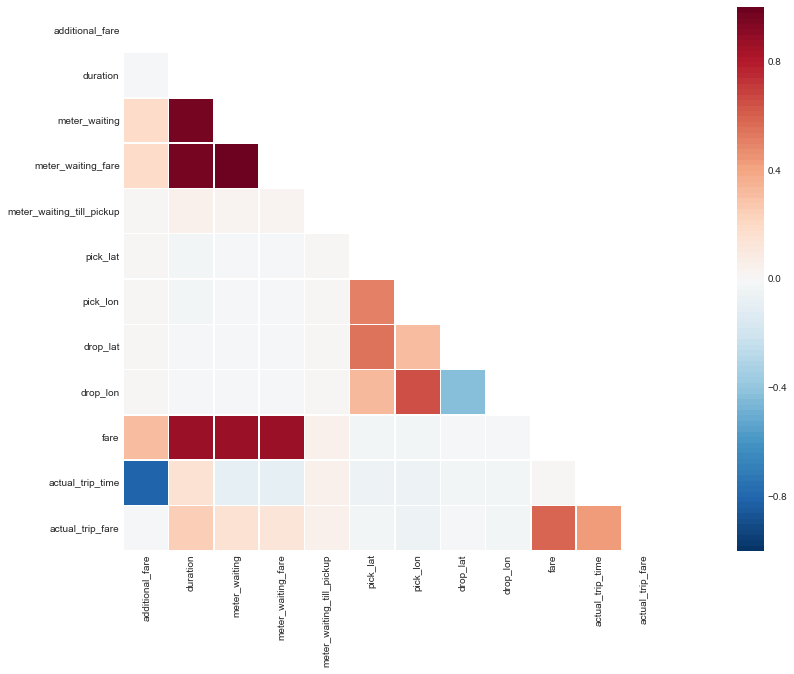

In [47]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

# Generate a mask for the upper triangle
mask = np.zeros_like(training_dataset.drop(["label"],axis=1).corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(training_dataset.drop(["label"],axis=1).corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);

In [48]:
testing_dataset =  testing_dataset[['actual_trip_time','meter_waiting','meter_waiting_fare','actual_trip_fare']]
X = training_dataset[['actual_trip_time','meter_waiting','meter_waiting_fare','actual_trip_fare']].values
Y = training_dataset['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42) 

In [49]:
reg = linear_model.LogisticRegression() 
reg.fit(X_train, y_train) 

print("TRAIN SET")
y_pred_train = reg.predict(X_train) 
print("Logistic Regression model accuracy(in %):",  metrics.accuracy_score(y_train, y_pred_train)*100)
scores = precision_recall_fscore_support(y_train,y_pred_train,average='micro')
print("Precison : "+str(scores[0])+", Recall : "+str(scores[1])+", F Score : "+str(scores[2]))

print("TEST SET")
y_pred = reg.predict(X_test) 
print("Logistic Regression model accuracy(in %):",  metrics.accuracy_score(y_test, y_pred)*100)
scores = precision_recall_fscore_support(y_test,y_pred,average='micro')
print("Precison : "+str(scores[0])+", Recall : "+str(scores[1])+", F Score : "+str(scores[2]))

TRAIN SET
Logistic Regression model accuracy(in %): 91.62246358508041
Precison : 0.916224635850804, Recall : 0.916224635850804, F Score : 0.9162246358508039
TEST SET
Logistic Regression model accuracy(in %): 91.61264977411118
Precison : 0.9161264977411118, Recall : 0.9161264977411118, F Score : 0.9161264977411117
